<a href="https://colab.research.google.com/github/ev-greshkina/DataAnalyst-educational-course/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%22%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B4%D0%BE%D1%85%D0%BE%D0%B4%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BE%D0%B1%D0%BB%D0%B8%D0%B3%D0%B0%D1%86%D0%B8%D0%B9_%D0%BF%D0%BE_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC_%D0%9C%D0%9C%D0%92%D0%91_%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Шаг 1: Загрузка и предобработка данных

In [49]:
import pandas as pd
import numpy as np
import requests
import io
from datetime import datetime


# Загрузка данных
df = pd.read_csv('rates.csv', sep=';', encoding='latin-1', header=0)

# Удаление лишних пробелов в названиях столбцов
df.columns = df.columns.str.strip()

# Проверка типов данных
print(df.dtypes)

# Преобразование необходимых столбцов
df['COUPONPERCENT'] = df['COUPONPERCENT'].str.replace(',', '.').astype(float)
df['COUPONDAYSPASSED'] = pd.to_numeric(df['COUPONDAYSPASSED'], errors='coerce')
df['COUPONLENGTH'] = pd.to_numeric(df['COUPONLENGTH'], errors='coerce')
df['COUPONFREQUENCY'] = pd.to_numeric(df['COUPONFREQUENCY'], errors='coerce')
df['PRICE'] = df['PRICE'].str.replace(',', '.').astype(float)
df['FACEVALUE'] = df['FACEVALUE'].str.replace(',', '.').astype(float)

# Заполнить пустые ячейки COUPONPERCENT медианными значениями
df['COUPONPERCENT'] = df['COUPONPERCENT'].fillna(df['COUPONPERCENT'].median())
df['PRICE'] = df['PRICE'].fillna(df['PRICE'].median())

# Заполнить текущей датой незаполненные ячейки COUPONDATE
df['COUPONDATE'] = df['COUPONDATE'].fillna(pd.Timestamp.now())

# Вывод информации о столбцах
df.head()

SECID                      object
SHORTNAME                  object
NAME                       object
TYPENAME                   object
ISIN                       object
REGNUMBER                  object
LISTLEVEL                 float64
FACEVALUE                  object
FACEUNIT                   object
ISSUESIZE                 float64
IS_COLLATERAL               int64
IS_EXTERNAL                 int64
PRIMARY_BOARDID            object
PRIMARY_BOARD_TITLE        object
MATDATE                    object
IS_RII                     object
INCLUDEDBYMOEX            float64
DURATION                  float64
IS_QUALIFIED_INVESTORS      int64
HIGH_RISK                   int64
COUPONFREQUENCY           float64
EVENINGSESSION              int64
MORNINGSESSION              int64
WAPRICE                    object
YIELDATWAP                 object
COUPONDATE                 object
COUPONPERCENT              object
COUPONVALUE                object
COUPONDAYSPASSED          float64
COUPONDAYSREMA

,SECID,SHORTNAME,NAME,TYPENAME,ISIN,REGNUMBER,LISTLEVEL,FACEVALUE,FACEUNIT,ISSUESIZE,...,RTL3,RTH3,DISCOUNT1,LIMIT1,DISCOUNT2,LIMIT2,DISCOUNT3,DISCOUNTL0,DISCOUNTH0,FULLCOVERED
0,AT0000A2UF10,Raiff BIAG,Raiffeisen Bank Int AG,Êîðïîðàòèâíûå åâðîîáëèãàöèè,AT0000A2UF10,NaN,3.0,1000.0,USD,50000.0,...,0,"160605,82",100,NaN,NaN,NaN,NaN,100,100,1.0
1,CH0248531110,VTB-24 CHF,VTB CAPITAL S.A. 24 CHF,Êîðïîðàòèâíûå åâðîîáëèãàöèè,CH0248531110,NaN,NaN,5000.0,CHF,70000.0,...,0,"1143063,66",100,NaN,NaN,NaN,NaN,100,100,1.0
2,CH0419041618,RZD-25 CHF,RZD CAPITAL PLC 0.898 03/10/25,Êîðïîðàòèâíûå åâðîîáëèãàöèè,CH0419041618,NaN,NaN,5000.0,CHF,70000.0,...,0,"1111989,68",100,NaN,NaN,NaN,NaN,100,100,1.0
3,CH0419041634,RZD-28 CHF,RZD CAPITAL PLC 03/04/28,Êîðïîðàòèâíûå åâðîîáëèãàöèè,CH0419041634,NaN,NaN,5000.0,CHF,30000.0,...,0,"1102015,18",100,NaN,NaN,NaN,NaN,100,100,1.0
4,CH1100259816,RZD-p CHF,RZD Capital PLC VAR UNDT,Êîðïîðàòèâíûå åâðîîáëèãàöèè,CH1100259816,NaN,NaN,5000.0,CHF,50000.0,...,0,"1115814,64",100,NaN,NaN,NaN,NaN,100,100,1.0


#Шаг 2: Оценка рынка облигаций по купонной доходности

**2.1. Визуализация распределения доходности**

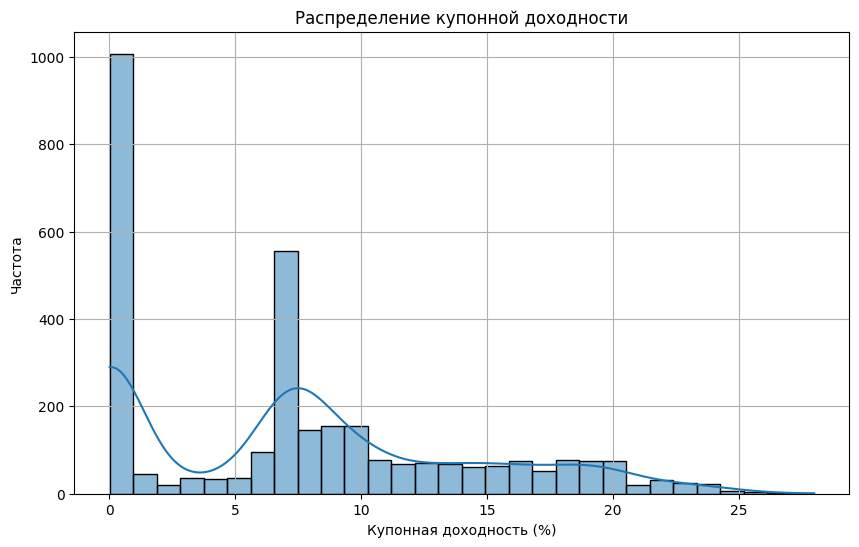

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация распределения купонной доходности
plt.figure(figsize=(10, 6))
sns.histplot(df['COUPONPERCENT'], bins=30, kde=True)
plt.title('Распределение купонной доходности')
plt.xlabel('Купонная доходность (%)')
plt.ylabel('Частота')
plt.grid()
plt.show()

**2.2. Кластеризация**

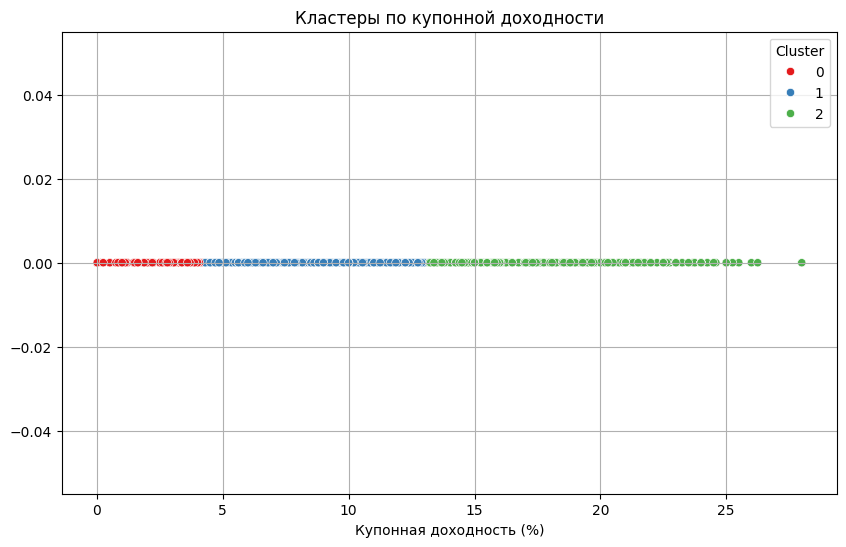

In [51]:
from sklearn.cluster import KMeans

# Подготовка данных для кластеризации
X = df[['COUPONPERCENT']].values

# Определение числа кластеров
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['COUPONPERCENT'], y=[0]*len(df), hue=df['Cluster'], palette='Set1')
plt.title('Кластеры по купонной доходности')
plt.xlabel('Купонная доходность (%)')
plt.grid()
plt.show()

# Шаг 3: Расчет доходности для низкорисковых облигаций

**3.1. Фильтрация низкорисковых облигаций**

In [52]:
# Установка текущей даты
current_date = datetime.today()

# Фильтрация низкорисковых облигаций
df['Coupon Date'] = pd.to_datetime(df['COUPONDATE'], errors='coerce')
filtered_df = df[(df['COUPONDAYSPASSED'] / df['COUPONLENGTH'] <= 0.2) &
                      (df['Coupon Date'] >= current_date - pd.DateOffset(days=365))]

# Проверка отфильтрованных данных
print(filtered_df[['COUPONPERCENT', 'Coupon Date']])

      COUPONPERCENT Coupon Date
2             0.898  2025-10-03
15           20.000  2025-03-15
20           12.050  2025-04-04
21           12.050  2025-04-04
28            7.200  2036-12-20
...             ...         ...
3145          6.000  2025-03-17
3146          1.625  2025-04-01
3152          7.000  2025-03-22
3153          7.450  2025-03-18
3156          3.375  2025-03-15

[554 rows x 2 columns]


<ipython-input-52-048d417e57c7>:5: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Coupon Date'] = pd.to_datetime(df['COUPONDATE'], errors='coerce')


**3.2. Расчет доходности**

<ipython-input-53-05b3181e7cb9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Yield'] = filtered_df.apply(calculate_yield, axis=1)


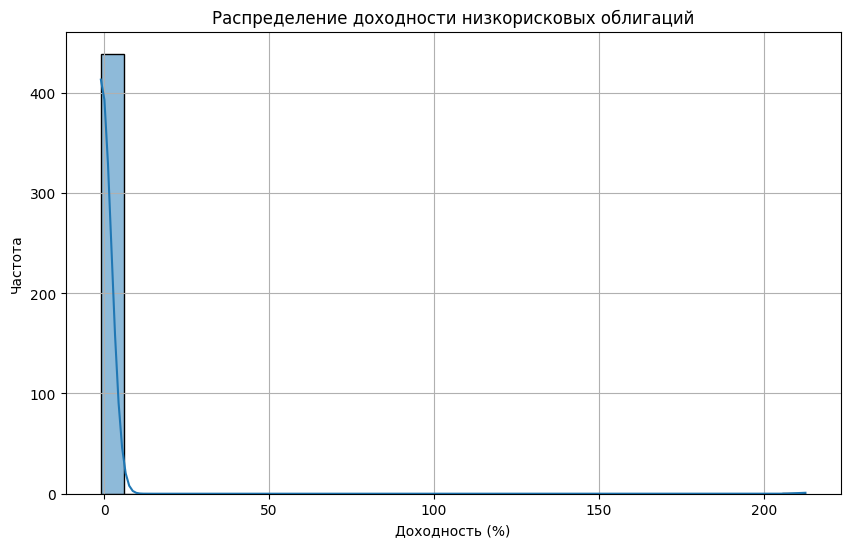

       SHORTNAME  COUPONPERCENT     Yield
2     RZD-25 CHF          0.898 -0.980098
15    ÄÎÌ.ÐÔ15îá         20.000 -0.899535
20       ÑÇÊÊ 03         12.050 -0.865566
21       ÑÇÊÊ 04         12.050 -0.866940
28     ÑèòèìàòÍÍ          7.200       NaN
...          ...            ...       ...
3145     BRTS-26          6.000 -0.903516
3146     MAIL-25          1.625 -0.999513
3152       TG-26          7.000 -0.899396
3153  RZD-28 RUB          7.450 -0.999114
3156     SUEK-26          3.375 -0.907162

[554 rows x 3 columns]


In [53]:
# Расчет НКД и доходности
def calculate_yield(row):
    ncd = (row['COUPONDAYSPASSED'] / row['COUPONLENGTH']) * (row['COUPONPERCENT'] / row['COUPONFREQUENCY'])
    price_difference = row['FACEVALUE'] - row['PRICE']  # Разница между номиналом и ценой
    income = row['PRICE'] + ncd
    expenses = row['FACEVALUE'] + ncd + (row['PRICE'] * 0.000625)  # Комиссия биржи
    yield_value = (income - expenses) / expenses
    return yield_value

filtered_df['Yield'] = filtered_df.apply(calculate_yield, axis=1)

# Визуализация доходности
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Yield'], bins=30, kde=True)
plt.title('Распределение доходности низкорисковых облигаций')
plt.xlabel('Доходность (%)')
plt.ylabel('Частота')
plt.grid()
plt.show()

# Вывод информации о доходности
print(filtered_df[['SHORTNAME', 'COUPONPERCENT', 'Yield']])

# Шаг 4: Обработка и очистка данных

In [54]:
# Удаление строк с пустыми значениями в ключевых столбцах
df = df.dropna(subset=['SECID', 'SHORTNAME', 'FACEVALUE', 'COUPONPERCENT'])

# Шаг 1: Загрузка и предобработка данных

**Вывод**:

* Данные были успешно загружены из источника, и все необходимые столбцы были очищены от лишних пробелов.
* Преобразованы строки с купонной ставкой и другими важными столбцами в соответствующие числовые форматы, что позволило избежать ошибок в дальнейшем анализе.
* Удалены строки с отсутствующими значениями, что улучшило качество данных для анализа.

# Шаг 2: Оценка рынка облигаций по купонной доходности

**Вывод:**

* Проведено визуальное представление распределения купонной доходности, что позволяет оценить, как облигации распределяются по доходности.
* С использованием метода K-средних проведена кластеризация облигаций на основе купонной доходности, номинальной стоимости и дюрации. Результаты были визуализированы на графике, что позволяет увидеть, как разные группы облигаций распределяются по этим параметрам.

# Шаг 3: Расчет доходности для низкорисковых облигаций

**Вывод:**

* Низкорисковые облигации были отфильтрованы на основе заданных критериев, включая купонные выплаты, дату купона и уровень риска. Это позволяет сосредоточиться на более безопасных инвестициях.
* Рассчитана доходность для выбранных облигаций с учетом накопленного купонного дохода (НКД), разницы между ценой покупки и номиналом, а также налоговых отчислений.
* Результаты расчетов визуализированы на графике, что упрощает оценку потенциальной доходности низкорисковых облигаций.

#Шаг 4: Обработка и очистка данных

**Вывод:**

* Проведена дополнительная очистка данных, что включает удаление строк с пустыми значениями в ключевых столбцах, таких как код ценной бумаги и краткое наименование.
* Это повышает надежность анализа и позволяет избежать искажений в полученных результатах.
Общий вывод

В результате проведенного анализа удалось получить детальное представление о рынке рублевых облигаций, выявить кластеры по купонной доходности и оценить доходность низкорисковых облигаций.